<a href="https://colab.research.google.com/github/Mjcherono/Final_dengue_disease_prediction./blob/main/dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DengAI: Predicting Disease Spread(Dengue)



### Problem Description
In cities where dengue is present, the disease is endemic. Globally, researchers estimate that dengue infects 390 million people per year ; however, only 50–100 million cases are detected due to the high asymptomatic rate . Estimating dengue burden can be problematic due to delays in case identification, strong intra- and inter-annual variation in incidence, and the majority of cases being clinically mild or asymptomatic . As a result, implementing effective vector control operations can be challenging. To overcome these issues, the development of accurate and timely early warnings systems capable of predicting future dengue incidence needs to be done.


### Determining Success Metrics.
For this project to be termed successful, if any of the models built achieve an accuracy of above 80% in prediction of total dengue cases.


### Experimental Design
*   Importing Libraries.
*   Loading dataset.
*   Data Cleaning and Preprocessing.
*   Exploratory data analysis.
*   Model Implementation.
*   Acccuracy check.





##### Libraries

In [1000]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

##### Loading data.

In [1001]:
#train

train=pd.read_csv("/content/dengue_features_train (1).csv")

In [1002]:
#preview of the head

train.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [1003]:
#shape

train.shape

(1456, 24)

In [1004]:
#Test data

test=pd.read_csv("/content/dengue_features_test (1).csv")

In [1005]:
# preview of head

test.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [1006]:
#shape

test.shape

(416, 24)

In [1007]:
#labels

labels=pd.read_csv("/content/dengue_labels_train.csv")

In [1008]:
labels.head(5)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [1009]:
labels.shape

(1456, 4)

###### Merging datasets


In [1010]:
trainmerge=train.merge(labels,on=["city","year","weekofyear"],how="right")
trainmerge.shape


(1456, 25)

In [1011]:
trainmerge.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,301.3,297.7,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,300.6,298.4,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,302.1,297.7,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,302.3,298.7,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


Description of Dataset.


In [1012]:
#train
print(trainmerge.describe())
#test set
print(test.describe())

              year   weekofyear  ...  station_precip_mm  total_cases
count  1456.000000  1456.000000  ...        1434.000000  1456.000000
mean   2001.031593    26.503434  ...          39.326360    24.675137
std       5.408314    15.019437  ...          47.455314    43.596000
min    1990.000000     1.000000  ...           0.000000     0.000000
25%    1997.000000    13.750000  ...           8.700000     5.000000
50%    2002.000000    26.500000  ...          23.850000    12.000000
75%    2005.000000    39.250000  ...          53.900000    28.000000
max    2010.000000    53.000000  ...         543.300000   461.000000

[8 rows x 23 columns]
              year  weekofyear  ...  station_min_temp_c  station_precip_mm
count   416.000000  416.000000  ...          407.000000         411.000000
mean   2010.766827   26.439904  ...           22.368550          34.278589
std       1.434835   14.978257  ...            1.731437          34.655966
min    2008.000000    1.000000  ...           14.200000 

In [1013]:
#summary of the combined set
print(trainmerge.info())

#test
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

the merged dataset has 1456 observations and 25 columns,2 objects, 3 integer values and 20 float columns.

In [1014]:
#Checking on target variable
trainmerge.total_cases.value_counts()

0      100
6       71
3       70
5       70
2       69
      ... 
135      1
137      1
141      1
142      1
461      1
Name: total_cases, Length: 135, dtype: int64

Changing week start date to date time.

In [1015]:
trainmerge.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [1016]:
#train test
trainmerge['week_start_date']=pd.to_datetime(trainmerge['week_start_date'],
                                             format='%Y/%m/%d')

#test set
test['week_start_date']=pd.to_datetime(test['week_start_date'],
                                             format='%Y/%m/%d')


###### Separating entries based on cities.

In [1017]:
# create new datasets
#train
sj = trainmerge[trainmerge['city'] == 'sj']
iq = trainmerge[trainmerge['city'] == 'iq']

#tests
sj_test = test[test['city'] == 'sj']
iq_test = test[test['city'] == 'iq']

In [1018]:
sj.shape

(936, 25)

In [1019]:
iq.shape

(520, 25)

In [1020]:
sj_test.shape

(260, 24)

In [1021]:
iq_test.shape

(156, 24)

###### Checking for null values

In [1022]:
#San Juan data
print(sj.isnull().sum())

#san juan test
print(sj_test.isnull().sum())

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c                         6
station_mi

In [1023]:
#Geting the percentage of missing data

print(sj.isnull().sum()/len(sj)*100)

#test
sj_test.isnull().sum()/len(sj)*100

city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
week_start_date                           0.000000
ndvi_ne                                  20.405983
ndvi_nw                                   5.235043
ndvi_se                                   2.029915
ndvi_sw                                   2.029915
precipitation_amt_mm                      0.961538
reanalysis_air_temp_k                     0.641026
reanalysis_avg_temp_k                     0.641026
reanalysis_dew_point_temp_k               0.641026
reanalysis_max_air_temp_k                 0.641026
reanalysis_min_air_temp_k                 0.641026
reanalysis_precip_amt_kg_per_m2           0.641026
reanalysis_relative_humidity_percent      0.641026
reanalysis_sat_precip_amt_mm              0.961538
reanalysis_specific_humidity_g_per_kg     0.641026
reanalysis_tdtr_k                         0.641026
station_avg_temp_c             

city                                     0.000000
year                                     0.000000
weekofyear                               0.000000
week_start_date                          0.000000
ndvi_ne                                  4.594017
ndvi_nw                                  1.175214
ndvi_se                                  0.106838
ndvi_sw                                  0.106838
precipitation_amt_mm                     0.213675
reanalysis_air_temp_k                    0.213675
reanalysis_avg_temp_k                    0.213675
reanalysis_dew_point_temp_k              0.213675
reanalysis_max_air_temp_k                0.213675
reanalysis_min_air_temp_k                0.213675
reanalysis_precip_amt_kg_per_m2          0.213675
reanalysis_relative_humidity_percent     0.213675
reanalysis_sat_precip_amt_mm             0.213675
reanalysis_specific_humidity_g_per_kg    0.213675
reanalysis_tdtr_k                        0.213675
station_avg_temp_c                       0.213675


We wont drop any columns since it's within the threshhold.

###### Imputing missing data


In [1024]:
#Imputing using forward fill.

sj.fillna(method='ffill',inplace=True)
sj.isnull().sum()

#test
sj_test.fillna(method='pad',inplace=True)
sj_test.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [1025]:
#Iquitos data
#train
print(iq.isnull().sum())

#test
print(iq_test.isnull().sum())

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c              

In [1026]:
#checking on percentages 
#train
print(iq.isnull().sum()/len(iq)*100)

#test
print(iq_test.isnull().sum()/len(iq)*100)

city                                     0.000000
year                                     0.000000
weekofyear                               0.000000
week_start_date                          0.000000
ndvi_ne                                  0.576923
ndvi_nw                                  0.576923
ndvi_se                                  0.576923
ndvi_sw                                  0.576923
precipitation_amt_mm                     0.769231
reanalysis_air_temp_k                    0.769231
reanalysis_avg_temp_k                    0.769231
reanalysis_dew_point_temp_k              0.769231
reanalysis_max_air_temp_k                0.769231
reanalysis_min_air_temp_k                0.769231
reanalysis_precip_amt_kg_per_m2          0.769231
reanalysis_relative_humidity_percent     0.769231
reanalysis_sat_precip_amt_mm             0.769231
reanalysis_specific_humidity_g_per_kg    0.769231
reanalysis_tdtr_k                        0.769231
station_avg_temp_c                       7.115385


Equally no dropping of columns they are all below 20%

Filling missing values in Iquitos data.

In [1027]:
#Imputed for missing values using forward fill method.
#train
iq.fillna(method='pad', inplace=True)
iq.isnull().sum()

#test
iq_test.fillna(method='pad', inplace=True)
iq_test.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

###### Duplicated Values


In [1028]:
#duplicated on Iquitos
#train
print(iq.duplicated().sum())
#test
print(iq_test.duplicated().sum())

0
0


In [1029]:
#duplicated on san juan
#train
print(sj.duplicated().sum())

#test
print(sj_test.duplicated().sum())

0
0


In [1030]:
sj.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


###### Outliers

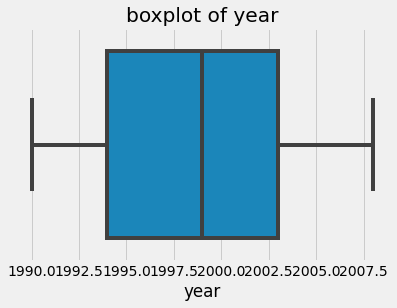

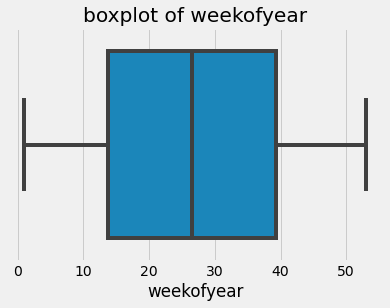

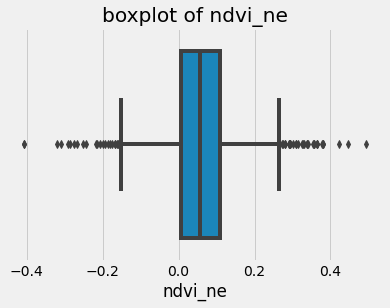

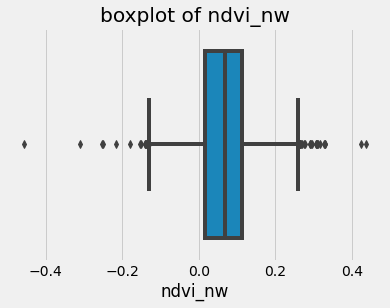

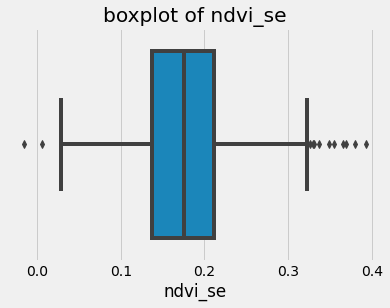

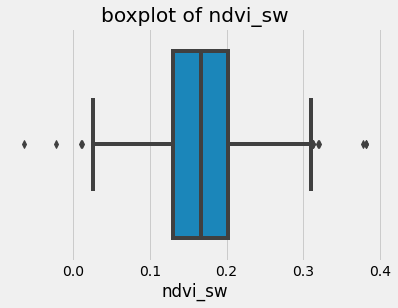

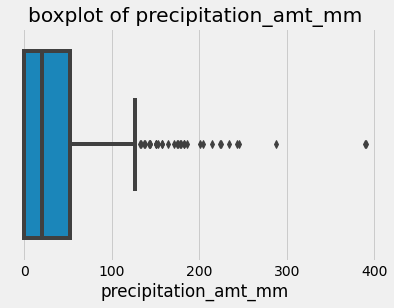

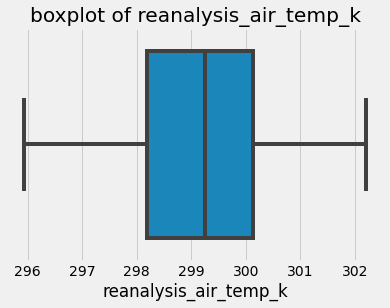

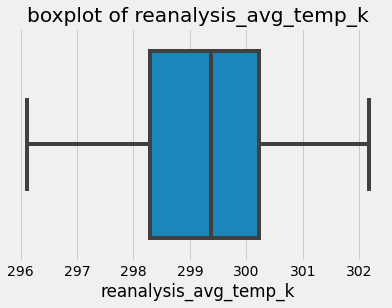

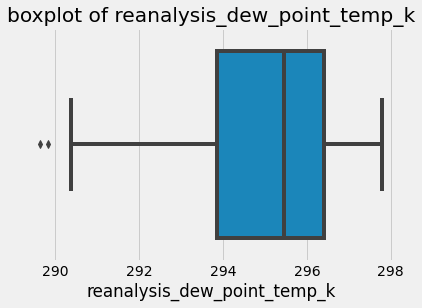

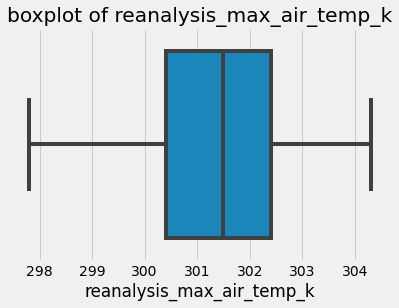

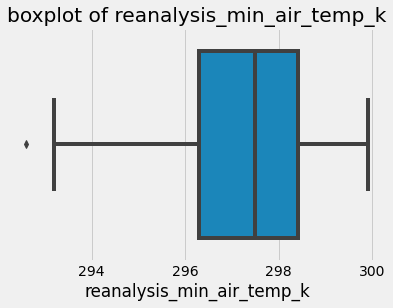

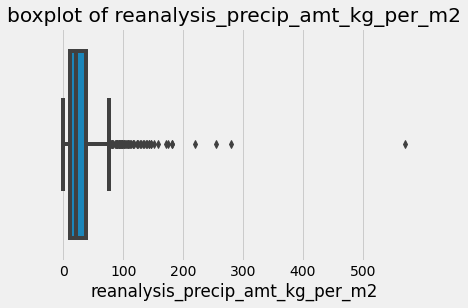

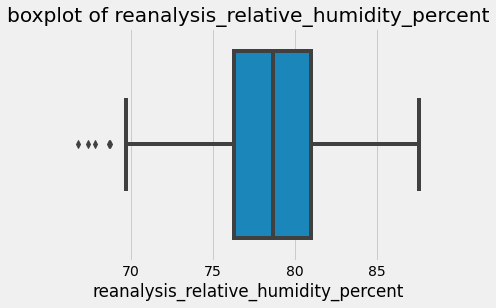

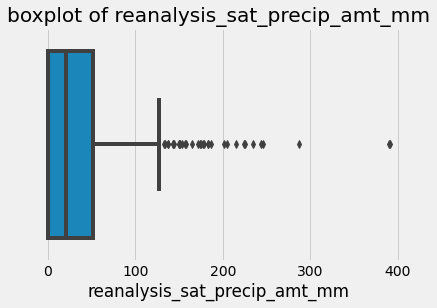

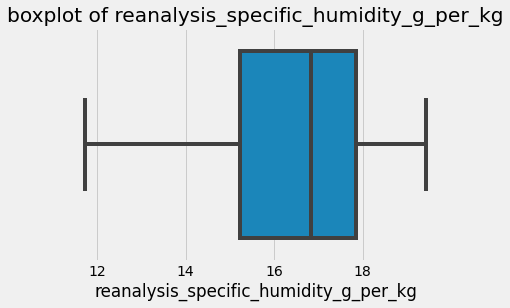

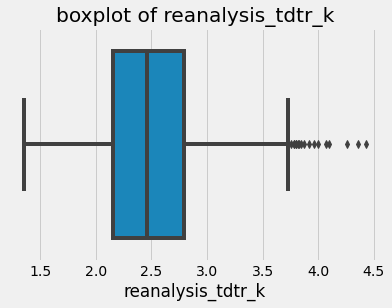

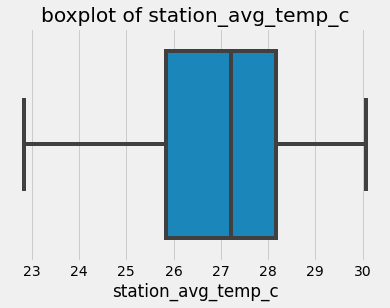

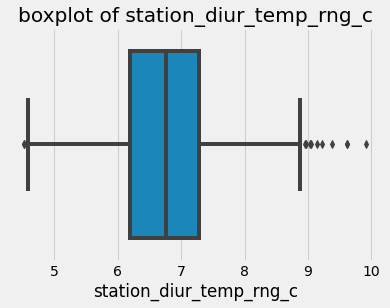

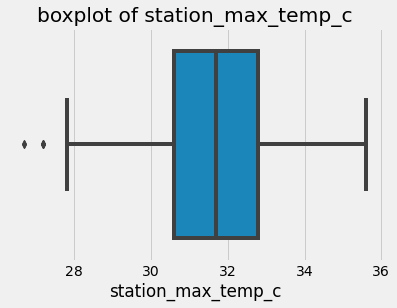

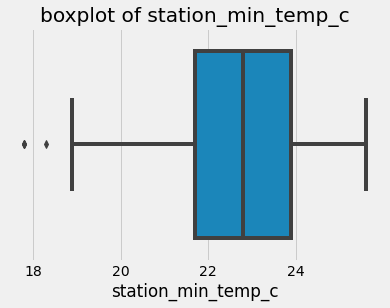

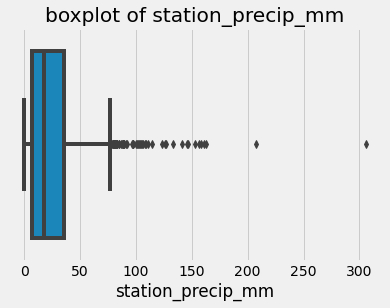

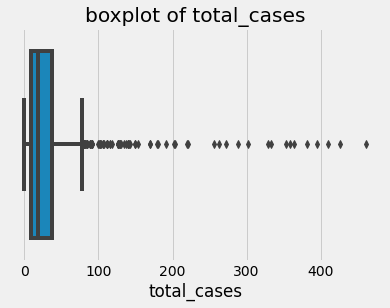

In [1031]:
#Numeric features
sj_num = sj.drop(['city','week_start_date'],axis=1)

colnames = list(sj_num.columns)
for i in colnames:
    plt.title(f'boxplot of {i}')
    sns.boxplot(sj_num[i])
    plt.show()



*   The outliers on NDVI columns won't be gotten rid of since they indicate areas with extreme cases in terms of vegetation cover. That at 0 and below corresponds to barren areas of rock or sand/ snow .Moderate values where the interquatile range is at represents shrubs and grasslands while high values represent temperature and tropical rainforests.



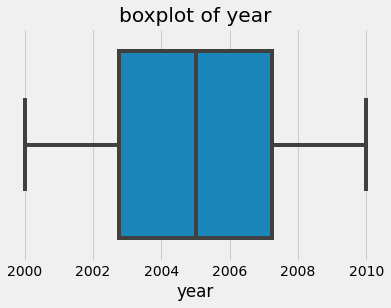

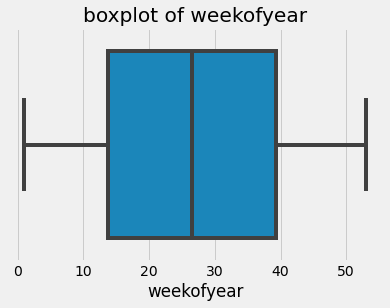

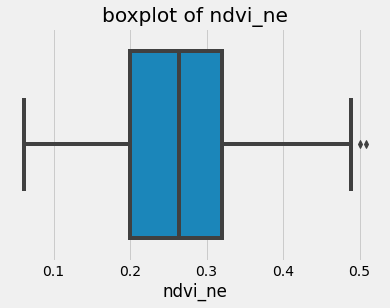

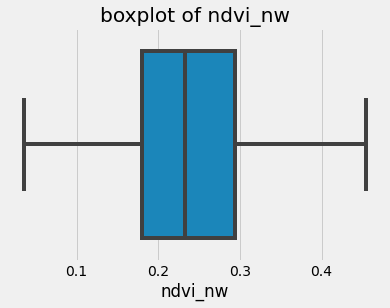

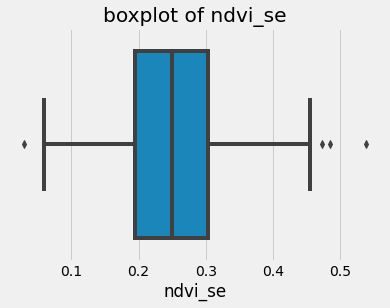

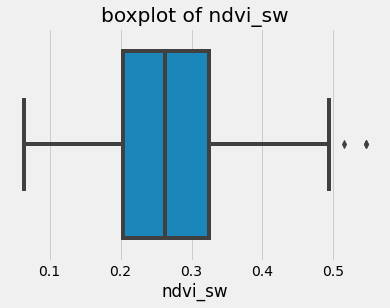

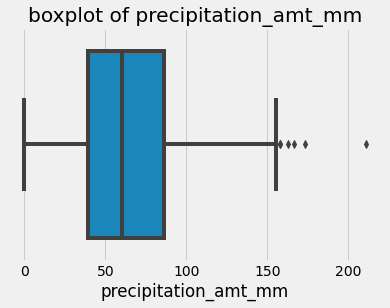

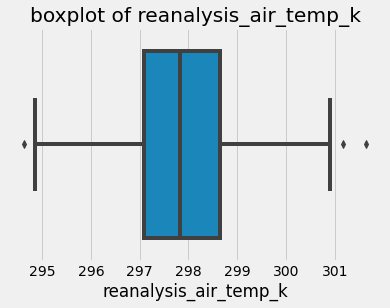

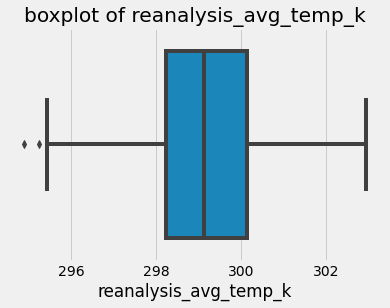

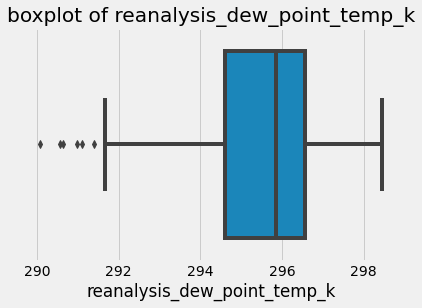

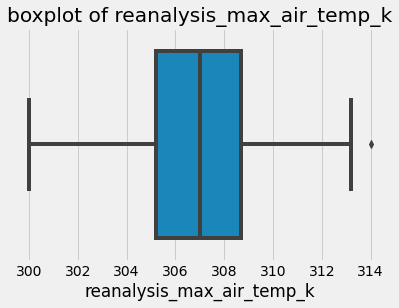

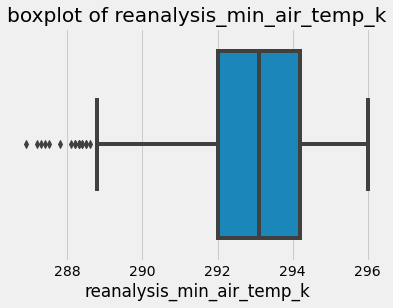

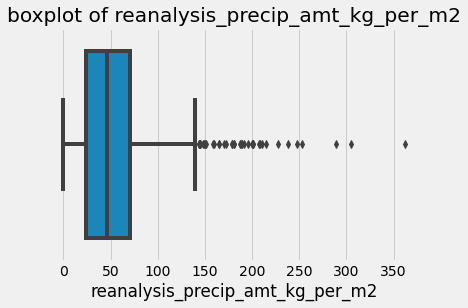

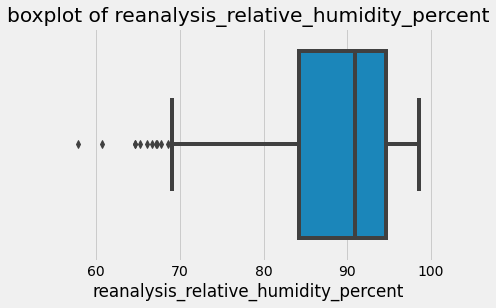

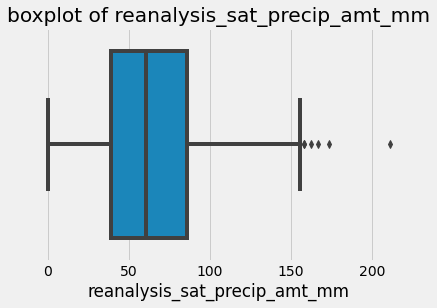

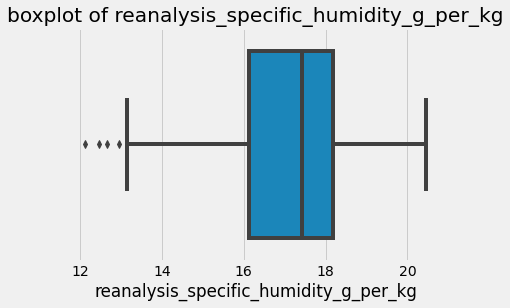

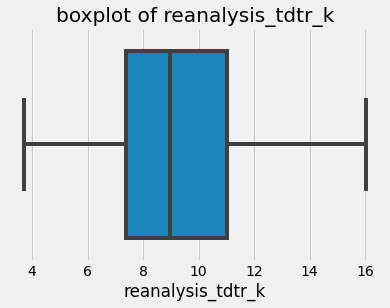

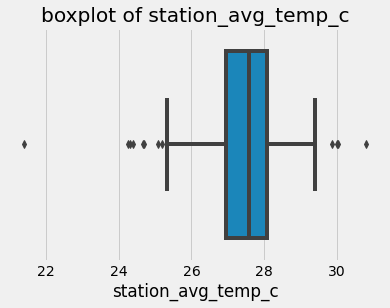

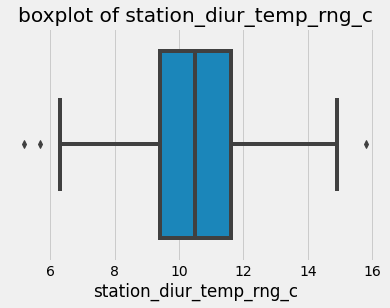

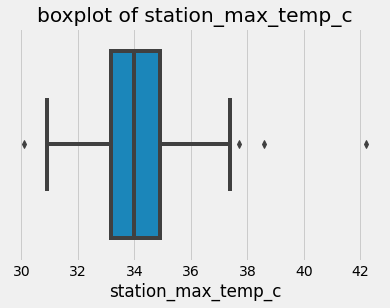

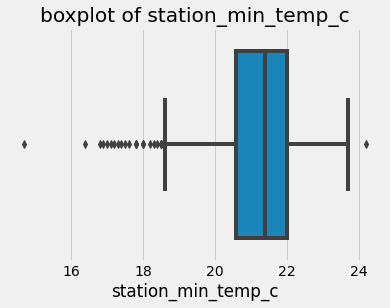

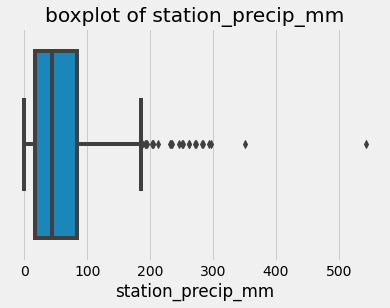

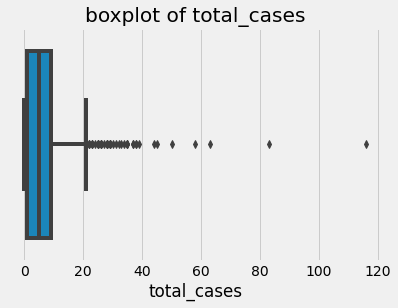

In [1032]:
#Numeric features
iq_num = iq.drop(['city','week_start_date'],axis=1)

colnames = list(iq_num.columns)
for i in colnames:
    plt.title(f'boxplot of {i}')
    sns.boxplot(iq_num[i])
    plt.show()

Description of data


In [1033]:
#train
print(sj.describe())
print(iq.describe())

              year  weekofyear  ...  station_precip_mm  total_cases
count   936.000000  936.000000  ...         936.000000   936.000000
mean   1998.826923   26.503205  ...          26.756838    34.180556
std       5.212076   15.021909  ...          29.264050    51.381372
min    1990.000000    1.000000  ...           0.000000     0.000000
25%    1994.000000   13.750000  ...           6.875000     9.000000
50%    1999.000000   26.500000  ...          17.650000    19.000000
75%    2003.000000   39.250000  ...          35.350000    37.000000
max    2008.000000   53.000000  ...         305.900000   461.000000

[8 rows x 23 columns]
              year  weekofyear  ...  station_precip_mm  total_cases
count   520.000000  520.000000  ...         520.000000   520.000000
mean   2005.000000   26.503846  ...          61.581346     7.565385
std       2.918283   15.029450  ...          62.968520    10.765478
min    2000.000000    1.000000  ...           0.000000     0.000000
25%    2002.750000   13.7

In [1034]:
#test
print(sj_test.describe())
print(iq_test.describe())

              year  weekofyear  ...  station_min_temp_c  station_precip_mm
count   260.000000  260.000000  ...          260.000000         260.000000
mean   2010.326923   26.503846  ...           23.096538          34.001538
std       1.492855   15.043951  ...            1.499919          36.175220
min    2008.000000    1.000000  ...           20.000000           0.000000
25%    2009.000000   13.750000  ...           21.700000           7.175000
50%    2010.000000   26.500000  ...           23.050000          22.100000
75%    2012.000000   39.250000  ...           24.400000          48.250000
max    2013.000000   53.000000  ...           26.700000         207.700000

[8 rows x 22 columns]
              year  weekofyear  ...  station_min_temp_c  station_precip_mm
count   156.000000  156.000000  ...          156.000000         156.000000
mean   2011.500000   26.333333  ...           21.152564          33.897436
std       0.960511   14.915821  ...            1.318428          31.842514
mi

### Exploratory Data Analysis.

#### Univariate Analysis.


1. Representation of cities in dataset.

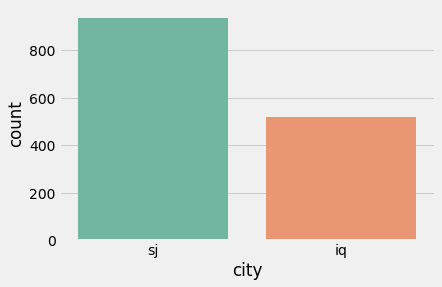

In [1035]:
#train
sns.countplot(x="city",data=trainmerge,palette = "Set2")


San Juan,Puerto Rico.

2. Distribution of Total cases.

0
461


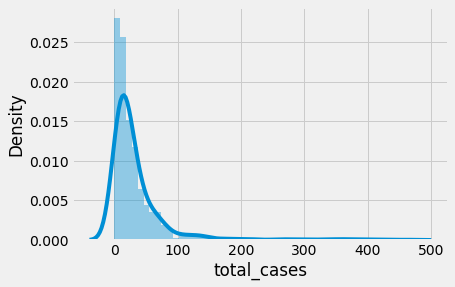

In [1036]:
# getting min value of total cases
print(sj['total_cases'].min())

# getting max value of total cases
print(sj['total_cases'].max())

#Plotting the distribution of total cases
sns.distplot(sj.total_cases)
plt.show()

Most entries done for total cases were at 0 to 50 and those at a 100and above 100 are less.

3. NVDI.


In [1037]:
# Checking on  min value of weekof year
print(sj['weekofyear'].min())

1


In [1038]:
# checking  min and max value of week start dates 
sj['weekofyear'].max()

53

In [1039]:
sj['ndvi_nw'].min()

-0.4561

Negative values of NDVI (values approaching -1) correspond to water. Valu`es close to zero (-0.1 to 0.1) generally correspond to barren areas of rock, sand, or snow. Lastly, low, positive values represent shrub and grassland (approximately 0.2 to 0.4), while high values indicate temperate and tropical rainforests (values approaching 1).

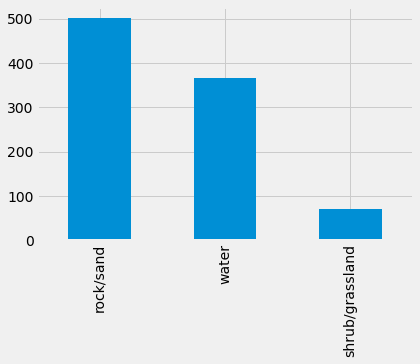

In [1040]:
#Vegetation 
#getting total vegetation
sj['ndvi_all_directions']=(sj['ndvi_ne']+sj['ndvi_nw']+sj['ndvi_se']+sj['ndvi_sw'])/4

# 
def get_ndvi_category(x):
    x=float(x)
    if x < 0.1: return 'water'
    if x >= 0.1 and x <0.2: return 'rock/sand'
    if x >=0.2 and x<0.5 : return 'shrub/grassland'
    if x > 0.6: return 'forest'
    return "other"

sj['ndvi_desc'] = sj.ndvi_all_directions.apply(get_ndvi_category)  

#calculating the value counts for type of vegetation.
sj['ndvi_desc'].value_counts().plot(kind='bar')

Most parts of this city are rocky and the rest is mostly water and a small part has shrubs.This was an expectation since San Juan is an Island in the carribean.

**Iquitos**.

In [1041]:
iq.dtypes

city                                             object
year                                              int64
weekofyear                                        int64
week_start_date                          datetime64[ns]
ndvi_ne                                         float64
ndvi_nw                                         float64
ndvi_se                                         float64
ndvi_sw                                         float64
precipitation_amt_mm                            float64
reanalysis_air_temp_k                           float64
reanalysis_avg_temp_k                           float64
reanalysis_dew_point_temp_k                     float64
reanalysis_max_air_temp_k                       float64
reanalysis_min_air_temp_k                       float64
reanalysis_precip_amt_kg_per_m2                 float64
reanalysis_relative_humidity_percent            float64
reanalysis_sat_precip_amt_mm                    float64
reanalysis_specific_humidity_g_per_kg           

1. Total Cases

0
116


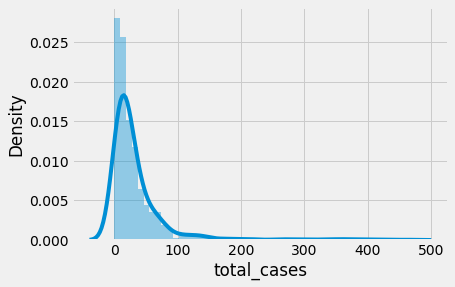

In [1042]:
# getting min and max value of total cases
print(iq['total_cases'].min())

# max value of total cases
print(iq['total_cases'].max())

#Plotting the distribution of total cases
sns.distplot(sj.total_cases)
plt.show()

Same as Iquitos, most entries are below 50 and reduces towards 100, above 100 are rare.

2. Weeks of year.

In [1043]:
iq['weekofyear'].max()

53

In [1044]:
iq['weekofyear'].unique()

array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51,  1,  2,  3,  4,  5,  6,  7,  8,
        9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,
       52, 53])

3. Vegetation

In [1045]:
iq['ndvi_ne'].min()

0.06172857

Negative values of NDVI (values approaching -1) correspond to water. Valu`es close to zero (-0.1 to 0.1) generally correspond to barren areas of rock, sand, or snow. Lastly, low, positive values represent shrub and grassland (approximately 0.2 to 0.4), while high values indicate temperate and tropical rainforests (values approaching 1).

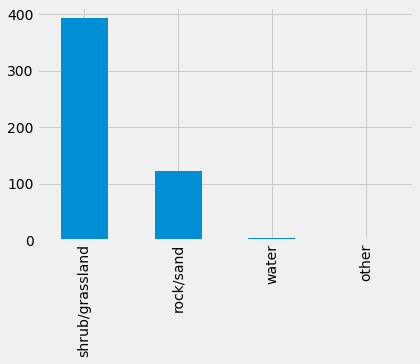

In [1046]:
# getting total vegetation
iq['ndvi_all_directions']=(iq['ndvi_ne']+iq['ndvi_nw']+iq['ndvi_se']+iq['ndvi_sw'])/4

# categorizing vegetation into different specific types
def get_ndvi_category(x):
    x=float(x)
    if x < 0.1: return 'water'
    if x >= 0.1 and x <0.2: return 'rock/sand'
    if x >=0.2 and x<0.5 : return 'shrub/grassland'
    if x > 0.6: return 'forest'
    return "other"
iq['ndvi_desc'] =iq.ndvi_all_directions.apply(get_ndvi_category)

# calculating frequency of thetype ofvegetation
iq['ndvi_desc'].value_counts().plot(kind='bar')

Most areas in iquitos are shrub/grassland.
observations
The worst year insan juan was 1994 while in iquitos it was 2008
In san juan the year with least cases was 2008 while iquitos peru the year2000 had zero cases
san juan is mostly rocky while iquitos is shrub/grassland.


#### Bivariate Analysis.

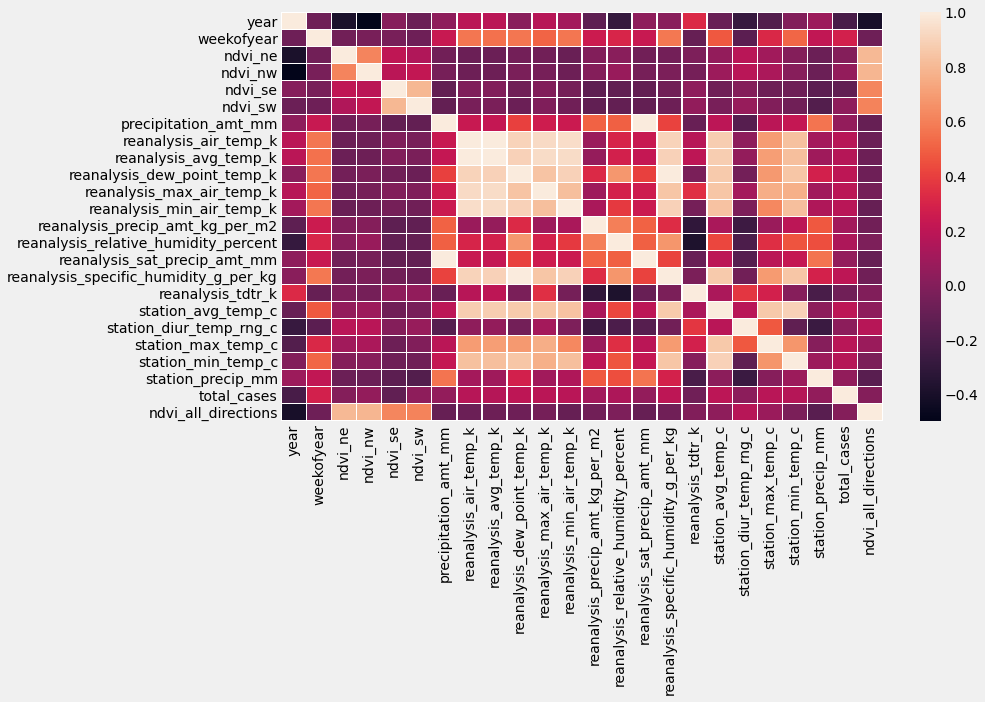

In [1047]:
# San Juan
data_corr = sj.corr()
fig, ax = plt.subplots(figsize=(12,7)) 
sns.heatmap(data_corr,linewidths=.6, ax=ax)





*  Apparently total number of dengue cases has no correlation with any feature.
Temperature: The temperature variables (reanalysis_air_temp_k to reanalysis_min_air_temp_k) are strongly correlated together in San Juan.





In [1048]:
sj.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases',
       'ndvi_all_directions', 'ndvi_desc'],
      dtype='object')

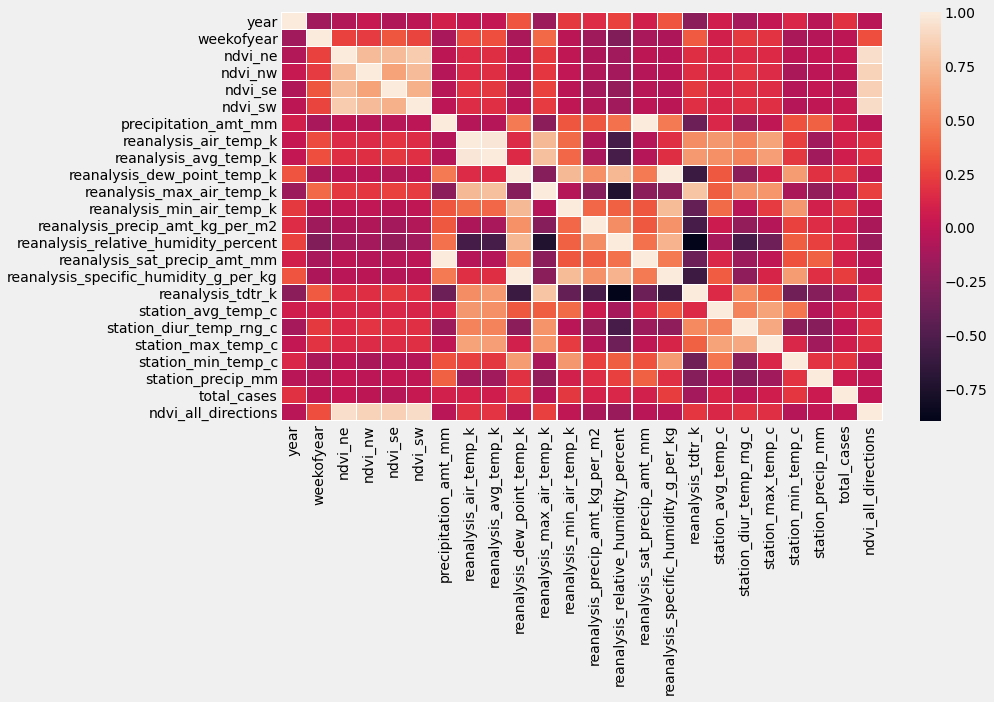

In [1049]:
#Iquitos
data_corr2 = iq.corr()
fig, ax = plt.subplots(figsize=(12,7)) 
sns.heatmap(data_corr2,linewidths=.3, ax=ax)

*   There is a correlation in NVDI for north east and south east in Iquitos.
*   Similarly withthe total number of cases at Iquitos there is no correlation.



Precipitation amounts have been constant over the years.

In [1050]:
sj_new = sj.copy()
iq_new = iq.copy()

##### Climatic Conditions(Weather)

To visualize weather conditions we will need to standardize them to do away with the units.

In [1051]:
from sklearn.preprocessing import StandardScaler

#Standardizing San Juan Features.
scaler = StandardScaler()
features = sj_new.columns[8:24]
scaled_sj = scaler.fit_transform(sj_new[features])
scaled_sj = pd.DataFrame(scaled_sj, columns = features, index=sj_new.index)
scaled_sj['weekofyear'] = sj_new['weekofyear']

#Standardizing Iquitos features.
features2 = iq_new.columns[8:24]
scaled_iq = scaler.fit_transform(iq_new[features])
scaled_iq = pd.DataFrame(scaled_iq, columns = features, index=iq_new.index)
scaled_iq['weekofyear'] = iq_new['weekofyear']
scaled_iq.head()

,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,weekofyear
936,-1.108024,-0.965058,-0.511702,-0.222531,0.097625,0.132999,-0.287564,0.495401,-1.108024,-0.312550,-0.106482,-1.218294,0.188781,-1.083150,-0.406188,-0.931223,26
937,-0.106517,-1.055384,-0.527794,-0.099187,-0.195572,-1.070817,-0.231451,0.648949,-0.106517,-0.165894,0.458286,-0.667693,0.696203,0.024569,-0.326603,-0.095081,27
938,-0.251337,-1.242140,-1.305601,0.087852,-1.075160,-0.167955,0.143368,0.948312,-0.251337,0.012472,-0.735296,-0.777813,0.632107,-0.713910,-0.406188,-0.373265,28
939,-1.671656,-2.146624,-2.179963,-1.911946,-1.452127,-2.575587,-0.671569,-0.189153,-1.671656,-1.852441,-0.030791,-1.915722,0.033884,-1.821628,-5.181264,-0.502025,29
940,-0.045345,-1.227492,-1.123219,-1.090998,-0.028031,-0.830054,-0.515012,-0.066729,-0.045345,-1.149878,0.126412,-0.998054,0.640653,-0.492367,-1.679541,-0.915327,30


Since weather conditions are best described during time of the year, We will plot our weather conditions against mweek of the year.

##### **San Juan Weather Conditions**

###### 1.Precipitation

Text(0.5, 0, 'Week of Year')

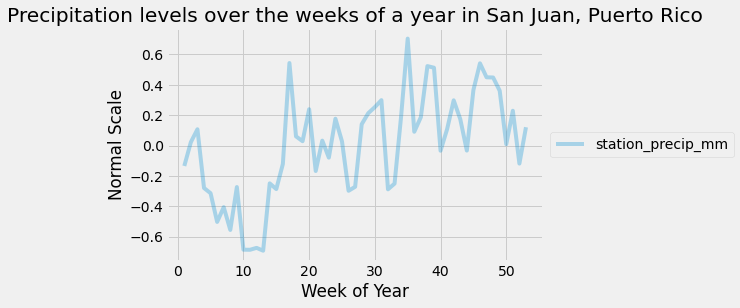

In [1052]:
#selecting columns
precipitation_sj = scaled_sj.iloc[:,[15,16]]
precipitation_sj.head()

precipitation_sj.groupby('weekofyear').mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Precipitation levels over the weeks of a year in San Juan, Puerto Rico')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

###### 2.Temperatures in San Juan Throughout the year

Text(0.5, 0, 'Week of Year')

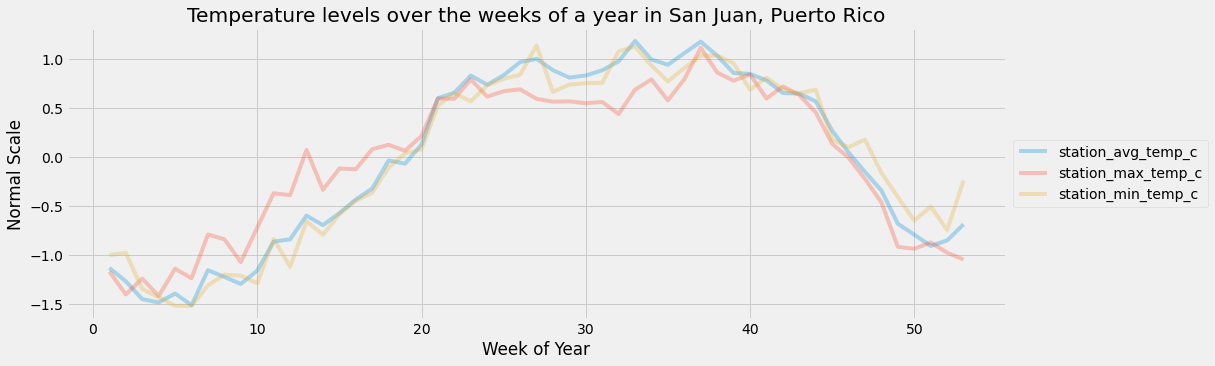

In [1053]:
#selecting columns
temp_sj = scaled_sj.iloc[:,[11,13,14,16]]

plt.subplots(figsize=(15, 5))

for i in (temp_sj.columns[0:3]):
  temp_sj.groupby('weekofyear')[i].mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Temperature levels over the weeks of a year in San Juan, Puerto Rico')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Temperatures are lower around the 25th week and rise from week 30 all the way to week 40.

###### 3.Humidity.

Text(0.5, 0, 'Week of Year')

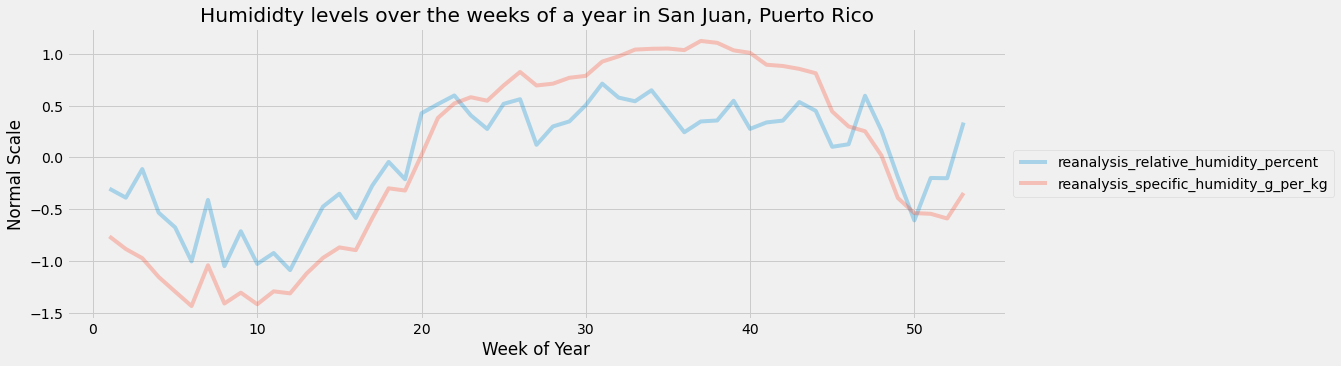

In [1054]:
#selecting columns
humidity_sj = scaled_sj.iloc[:,[7,9,16]]

plt.subplots(figsize=(15, 5))

for i in (humidity_sj.columns[0:2]):
  humidity_sj.groupby('weekofyear')[i].mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Humididty levels over the weeks of a year in San Juan, Puerto Rico')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Humidity is high from week 20 all the way to week 40.

###### 4.NVDI-Vegetation cover

Finding the mean of vegetation for each week in the four quadrants.(NE,NW,SE,SW)

Since the four features represent the different parts of the city(San Juan) we can as well get an average of vegetation cover per week.

In [1055]:
# creating the  mean NVDI for each week for each city
sj_new['nvdi_mean'] = sj_new[sj_new.columns[4:8]].mean(axis = 1)
iq_new['nvdi_mean'] = iq_new[iq_new.columns[4:8]].mean(axis = 1)

Mean of NVDI over the weeks.

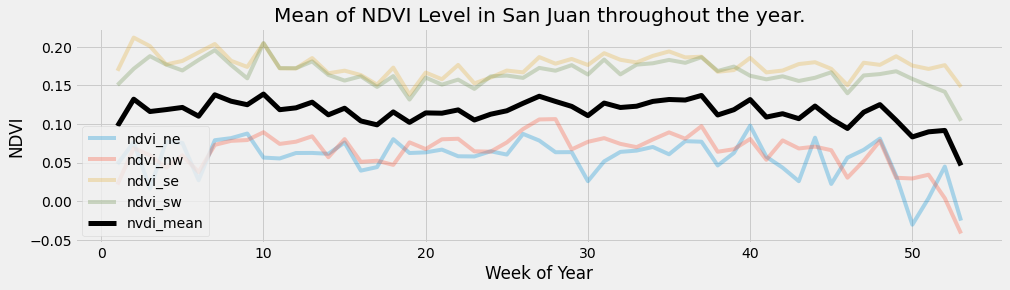

In [1056]:
# plot week by week average vegetation for San Juan
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

plt.subplot()
for name in sj_new.columns[4:8]:
  sj_new.groupby('weekofyear')[name].mean().plot(alpha = .3)
sj_new.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5) 
plt.title('Mean of NDVI Level in San Juan throughout the year.')
plt.xlabel('Week of Year')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
plt.tight_layout(pad=3)


The NVDI scores in SW and SE are lower than the scores of NW and NE but then the average remains constant.There is a decrease around the last months of the years though.

**Mean of NVDI over the years In San Juan Purto Rico.**

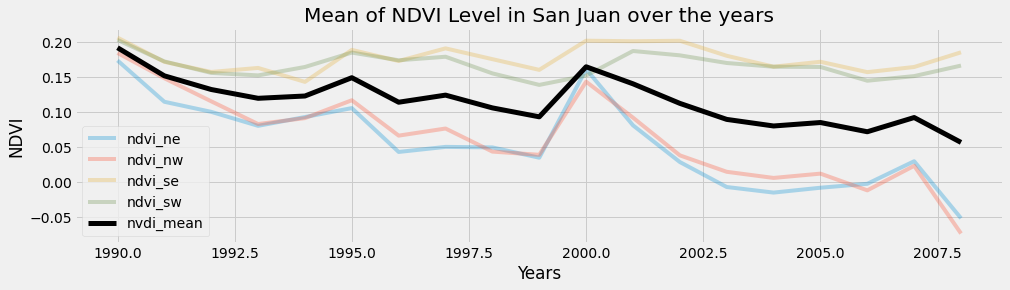

In [1057]:
# plot week by week average vegetation for San Juan
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

plt.subplot()
for name in sj_new.columns[4:8]:
  sj_new.groupby('year')[name].mean().plot(alpha = .3)
sj_new.groupby('year')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5) 
plt.title('Mean of NDVI Level in San Juan over the years')
plt.xlabel('Years')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
plt.tight_layout(pad=3)


On average te number of dengue cases rise from week 25(June) till week 40(September) when it's at the peek then go down significantly over the weeks and is lowest between week 10(March) and week 20(May).

#### **Iquitos Weather Conditions**.

###### 1.Precipitation.

Text(0.5, 0, 'Week of Year')

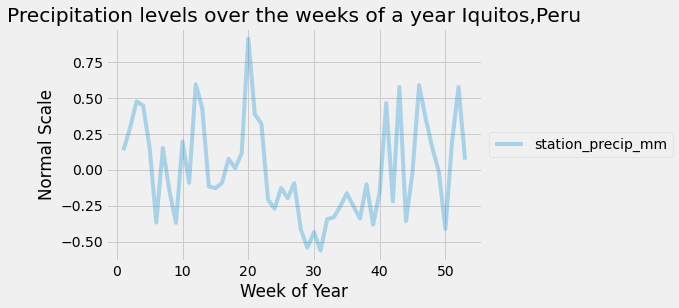

In [1058]:
#selecting columns
precipitation_iq = scaled_iq.iloc[:,[15,16]]

precipitation_iq.groupby('weekofyear').mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Precipitation levels over the weeks of a year Iquitos,Peru')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Humidity is a measure of the amount of water vapour being held in the air. Water vapour is a gas. Precipitation is when the gas turns to liquid or solid and forms rain, snow, hail, mist, fog, frost, dew etc

###### 2.Temperatures in Iquitos,Peru throughout the year.

Text(0.5, 0, 'Week of Year')

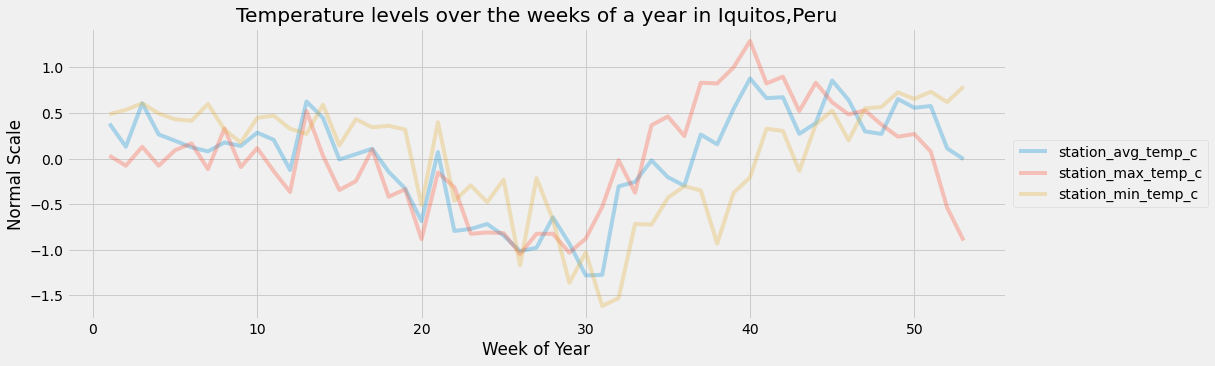

In [1059]:
#selecting columns
temp_iq = scaled_iq.iloc[:,[11,13,14,16]]

plt.subplots(figsize=(15, 5))

for i in (temp_iq.columns[0:3]):
  temp_iq.groupby('weekofyear')[i].mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Temperature levels over the weeks of a year in Iquitos,Peru')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

In Iquitos, Temeratures are lower at week 20 to week 30 then there is a rise at week 30 until week 40.

###### 3.Humidity Levels in Iquitos,Peru.

Text(0.5, 0, 'Week of Year')

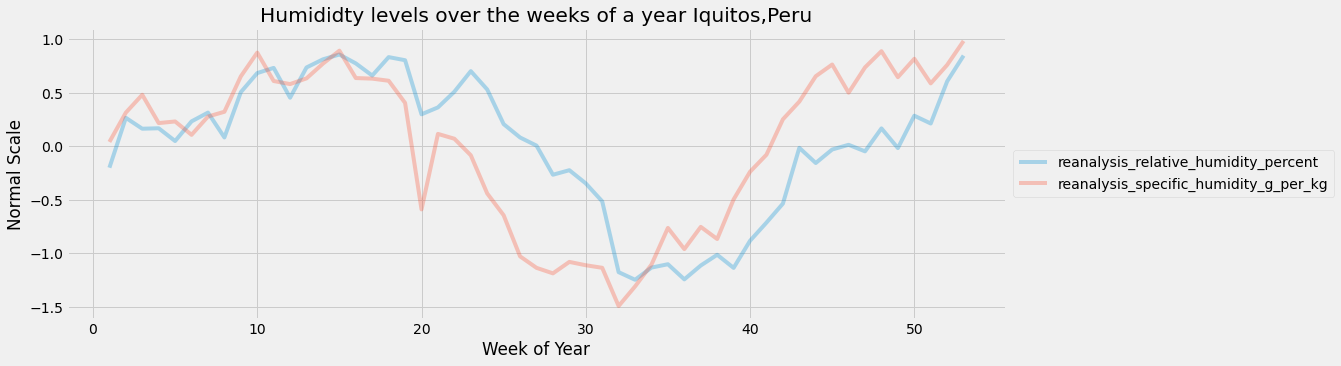

In [1060]:
#selecting columns
humidity_iq = scaled_iq.iloc[:,[7,9,16]]

plt.subplots(figsize=(15, 5))

for i in (humidity_iq.columns[0:2]):
  humidity_iq.groupby('weekofyear')[i].mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Humididty levels over the weeks of a year Iquitos,Peru')
plt.ylabel('Normal Scale')
plt.xlabel('Week of Year')

Humididty levela go low as temperature gets rising at week 30 there about.

###### 4.NVDI-Vegetation cover - Iquitos,Peru.


Mean of NVDI over the weeks in Iquitos,Peru.


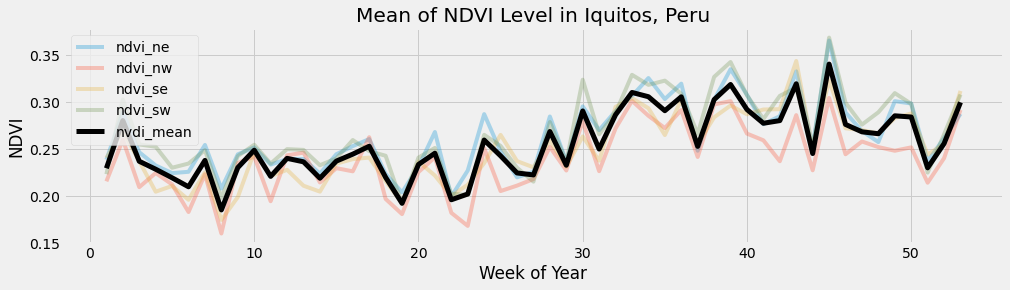

In [1061]:
# plot week by week average vegetation for San Juan
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

plt.subplot()
for name in iq_new.columns[4:8]:
  iq_new.groupby('weekofyear')[name].mean().plot(alpha = .3)
iq_new.groupby('weekofyear')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5) 
plt.title('Mean of NDVI Level in Iquitos, Peru')
plt.xlabel('Week of Year')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
plt.tight_layout(pad=3)


Iquitos show a consistent NVDI score throughout though there is an rise around week 25 to 45 there about.

Mean of NVDI over the years in Iquitos,Peru.

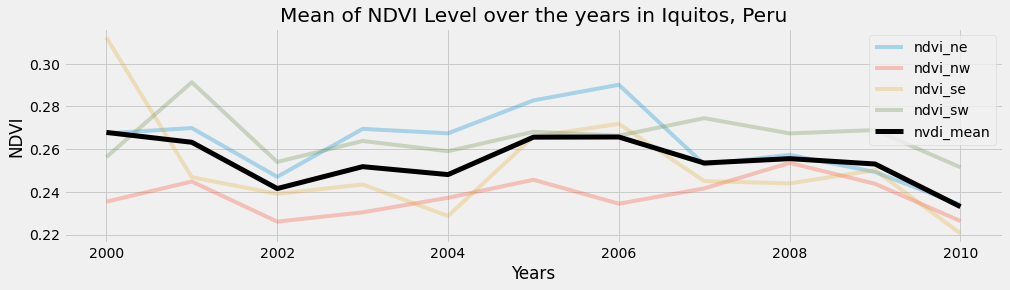

In [1062]:
# plot week by week average vegetation for Iquitos.
fig, ax = plt.subplots(2, 1, figsize=(15, 5))

plt.subplot()
for name in iq_new.columns[4:8]:
  iq_new.groupby('year')[name].mean().plot(alpha = .3)
iq_new.groupby('year')['nvdi_mean'].mean().plot(alpha = 1, c = 'k', linewidth = 5) 
plt.title('Mean of NDVI Level over the years in Iquitos, Peru')
plt.xlabel('Years')
plt.ylabel('NDVI')
plt.legend(loc = 'best')
plt.tight_layout(pad=3)#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area.


###### Distribution of Total Cases Over the years.

Text(0.5, 1.0, 'Distribution of Total Dengue cases over the years in Iquitos')

<Figure size 432x288 with 0 Axes>

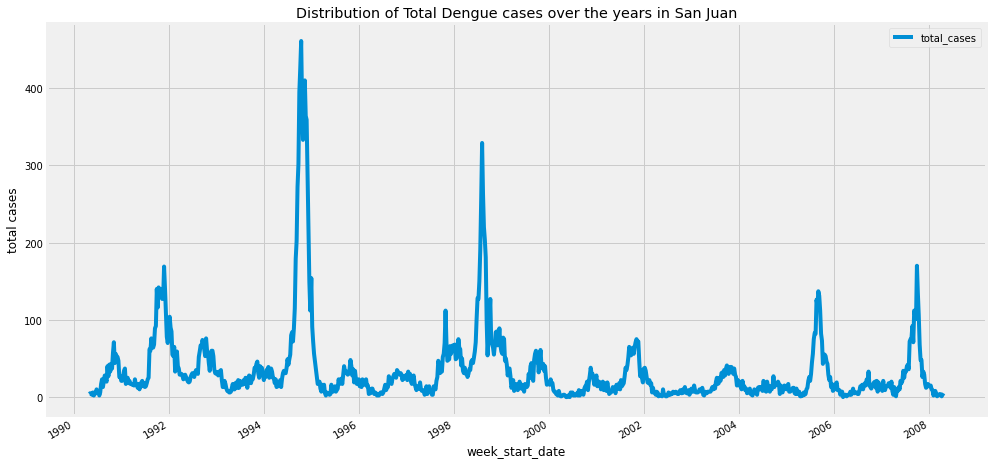

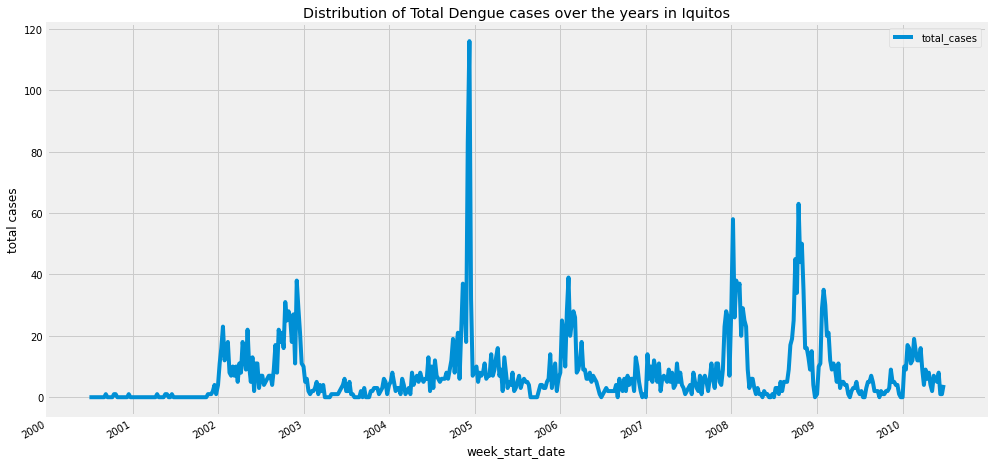

In [1063]:
%matplotlib inline

plt.figure()
ax = sj[['week_start_date', 'total_cases']].plot('week_start_date', figsize=(15,8))
ax1 = iq[['week_start_date', 'total_cases']].plot('week_start_date', figsize=(15,8))
ax.set_ylabel('total cases')
ax1.set_ylabel('total cases')#Iquitos

ax.set_title('Distribution of Total Dengue cases over the years in San Juan')
ax1.set_title('Distribution of Total Dengue cases over the years in Iquitos')

**San Juan**

From June 1994 to May 1995, a very high number of dengue cases was recorded in San Juan, Puerto Rico. This epidemic produced the largest number of hospitalizations.

Also at the onset of 1999 there was relatively high reports of cases of people that were infected with Dengue.


**Iquitos.**

There was a high recording of dengue cases in Iquitos at the end of 2004 approaching 2005 and later rose between 2008 and 2009.[link text](https://www.researchgate.net/figure/Dengue-epidemics-overlaid-to-illustrate-shifting-of-peak-incidence-The-epidemics-are_fig10_264009350)

We could refer to this outliers as outbreaks.


###### Total Cases over the weeks.
1. San Juan, Puerto Rico.

Text(0.5, 0, 'Week of Year')

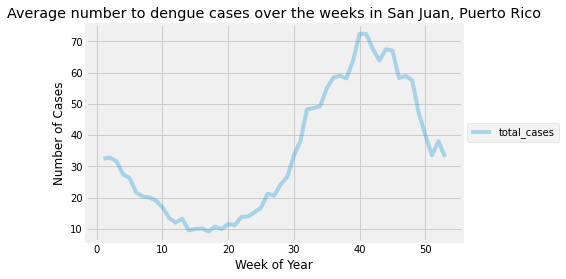

In [1064]:
df = scaled_sj.copy()
df['total_cases'] = sj['total_cases']

#selecting columns
df1 = df[['total_cases','weekofyear']]

df1.groupby('weekofyear').mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average number to dengue cases over the weeks in San Juan, Puerto Rico')
plt.ylabel('Number of Cases')
plt.xlabel('Week of Year')

In San Juan, Puerto Rico, the average number of cases reported per week is normally lowfrom beginning of week 10(March) to week 20(May) then rises after that and is highest at week 40 which is around October before a gradual decrease again.

2. Iquitos

Text(0.5, 0, 'Week of Year')

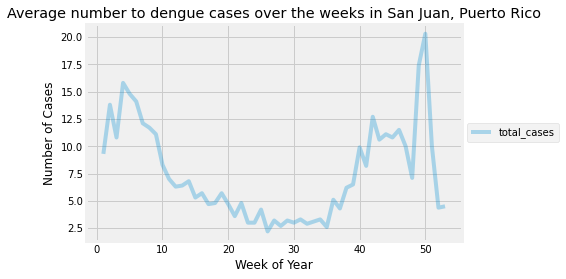

In [1065]:
df11 = scaled_iq.copy()
df11['total_cases'] = iq['total_cases']

#selecting columns
df111 = df11[['total_cases','weekofyear']]

df111.groupby('weekofyear').mean().plot(alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Average number to dengue cases over the weeks in San Juan, Puerto Rico')
plt.ylabel('Number of Cases')
plt.xlabel('Week of Year')

In Iquitos, dengue cases are rise from week 35 and is highest at week 50(December) then drops for a span of two weeks and rises again in January.
Cases are low in the middle of the year.





### Feature Engineering.

In [1102]:
#Train set

final_sj = sj.drop(['year','week_start_date','precipitation_amt_mm','reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k',
                      'reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','ndvi_all_directions','ndvi_desc','city'],axis=1)

#Test set
final_sjtest = sj_test.drop(['year','week_start_date','precipitation_amt_mm','reanalysis_air_temp_k','reanalysis_avg_temp_k','reanalysis_dew_point_temp_k','reanalysis_max_air_temp_k','reanalysis_min_air_temp_k',
                      'reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','city'],axis=1)
final_sjtest.head()

,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,18,-0.0189,-0.018900,0.102729,0.091200,25.37,78.781429,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,19,-0.0180,-0.012400,0.082043,0.072314,21.83,78.230000,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,20,-0.0015,-0.012400,0.151083,0.091529,4.12,78.270000,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,21,-0.0015,-0.019867,0.124329,0.125686,2.20,73.015714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,22,0.0568,0.039833,0.062267,0.075914,4.36,74.084286,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [1103]:
print(final_sj.shape)
print(final_sjtest.shape)

(936, 14)
(260, 13)


In [1104]:
# Iquitos data train
final_iq = iq.drop(['year','week_start_date','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','reanalysis_air_temp_k','reanalysis_sat_precip_amt_mm','precipitation_amt_mm','reanalysis_dew_point_temp_k','reanalysis_specific_humidity_g_per_kg',
                  'reanalysis_avg_temp_k','ndvi_desc','ndvi_all_directions','city'],axis=1)
print(final_iq.head())

#test
final_iqtest = iq_test.drop(['year','week_start_date','ndvi_ne','ndvi_nw','ndvi_se','ndvi_sw','reanalysis_air_temp_k','reanalysis_sat_precip_amt_mm','precipitation_amt_mm','reanalysis_dew_point_temp_k','reanalysis_specific_humidity_g_per_kg',
                  'reanalysis_avg_temp_k','city'],axis=1)
print(final_iqtest.head())

     weekofyear  reanalysis_max_air_temp_k  ...  station_precip_mm  total_cases
936          26                      307.3  ...                3.0            0
937          27                      306.6  ...               55.6            0
938          28                      304.5  ...               38.1            0
939          29                      303.6  ...               30.0            0
940          30                      307.0  ...                4.0            0

[5 rows x 12 columns]
     weekofyear  ...  station_precip_mm
260          26  ...               11.2
261          27  ...                8.9
262          28  ...               22.6
263          29  ...                4.8
264          30  ...                3.0

[5 rows x 11 columns]


In [1105]:
print(final_iq.shape)
print(final_iqtest.shape)

(520, 12)
(156, 11)


### MLPRegressor for Test Prediction.

In [1106]:
#Libraries necessary for multilayer perceptron

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error as MAE

In [1114]:
#Creating train and test
X_train = final_sj.drop(labels=['total_cases'], axis=1)
y_train = final_sj['total_cases']
X_test = final_sjtest


In [1115]:
# Invalid enties

X_train.station_max_temp_c = X_train.station_max_temp_c.replace([35. ,30.],[35.0,30.0], inplace=True)
X_train.station_diur_temp_rng_c = X_train.station_diur_temp_rng_c.replace([7. ,6.],[7.0,6.0], inplace=True)


In [1116]:
# Standardizing the X_train and the X_test to the same scale
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1117]:
mlp_reg = MLPRegressor()

param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
          'activation': ['relu','tanh','logistic'],
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam']}

gsc = GridSearchCV(
    mlp_reg,
    param_grid,
    cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)


best_params = grid_result.best_params_

best_mlp = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
                        activation =best_params["activation"],
                        solver=best_params["solver"],
                        max_iter= 5000, n_iter_no_change = 200
              )

scoring = {
           'abs_error': 'neg_mean_absolute_error',
           'squared_error': 'neg_mean_squared_error',
           'r2':'r2'}


ValueError: ignored

In [ ]:
#predict
y_true, y_pred = y_test, clf.predict(X_test).astype(int)

#making the predictions the total cases entry of the test set
pred_sj = pd.DataFrame(y_pred, columns=["total_cases"])
pred_sj.insert(0, 'city', 'sj')

#view the final test set
pred_sj

Iquitos.

In [1110]:
#Separating train and test
X_train = final_iq.drop(labels=['total_cases'], axis=1)
y_train = final_iq['total_cases']
X_test = final_iqtest

#building model
clf = MLPRegressor()
clf.fit(X_train, y_train)

#predict
y_pred = clf.predict(X_test).astype(int)

pred_iq = pd.DataFrame(y_pred, columns=["total_cases"])
pred_iq.insert(0, 'city', 'iq')
pred_iq

# combining the predictions
#submission = pred_sj.append(pred_iq, ignore_index=True)
#submission.to_csv('denguee.csv', index = False)

# To download the csv file locally
#from google.colab import files
#with open('denguee.csv', 'r') as f:
#files.download('denguee.csv')

,city,total_cases
0,iq,5
1,iq,3
2,iq,7
3,iq,3
4,iq,4
...,...,...
151,iq,8
152,iq,7
153,iq,7
154,iq,2


#### **Decomposition of data**
Decomposing enables us to see trends, seasonality or any noise in the data.

San Juan.

In [1066]:
df_sj = sj_new[['week_start_date','total_cases']]
df_sj  = df_sj = df_sj.set_index('week_start_date')
df_sj

,total_cases
week_start_date,
1990-04-30,4
1990-05-07,5
1990-05-14,4
1990-05-21,3
1990-05-28,6
...,...
2008-03-25,4
2008-04-01,3
2008-04-08,1


In [1067]:
ts = df_sj['total_cases']
ts

week_start_date
1990-04-30    4
1990-05-07    5
1990-05-14    4
1990-05-21    3
1990-05-28    6
             ..
2008-03-25    4
2008-04-01    3
2008-04-08    1
2008-04-15    3
2008-04-22    5
Name: total_cases, Length: 936, dtype: int64

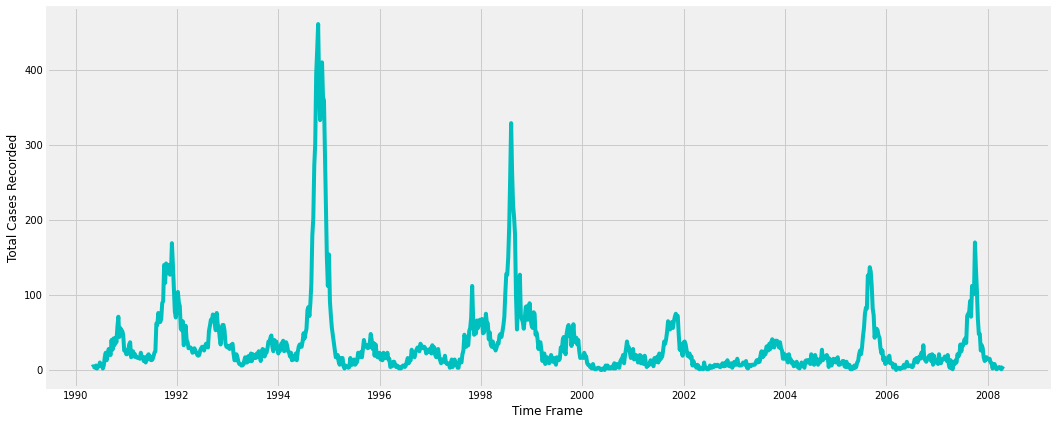

In [1068]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Total Cases Recorded')
ax1.plot(ts, color='c')

In [1069]:
from pylab import rcParams

dec = sj[['week_start_date','total_cases']]
dec.set_index('week_start_date',inplace=True)
dec.head()

,total_cases
week_start_date,
1990-04-30,4
1990-05-07,5
1990-05-14,4
1990-05-21,3
1990-05-28,6


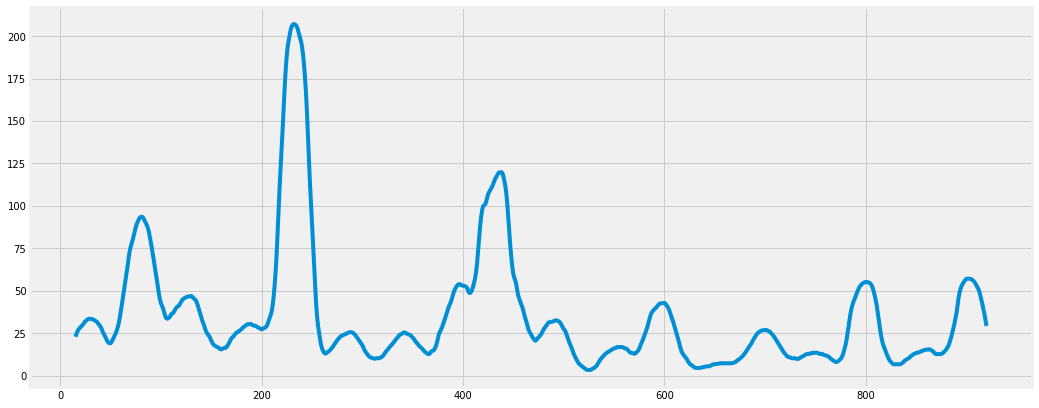

In [1070]:
#Decomposing to three components 
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

#Use an additive model
result = seasonal_decompose(sj['total_cases'], model='additive',freq=30)

plt.figure(figsize=(16,7))
plt.plot(result.trend)

There is no clrear trend over the years.

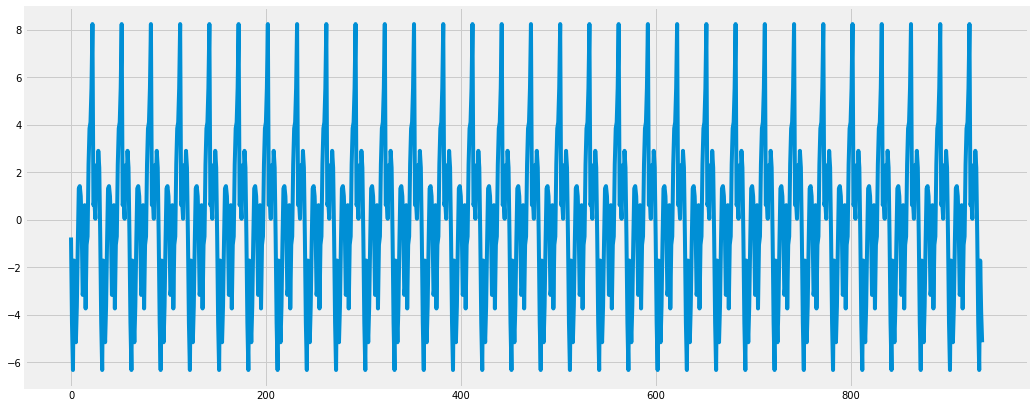

In [1071]:
#Seasonality

plt.figure(figsize=(16,7))
plt.plot(result.seasonal)

There is some seasonality visible in a duration of one year.

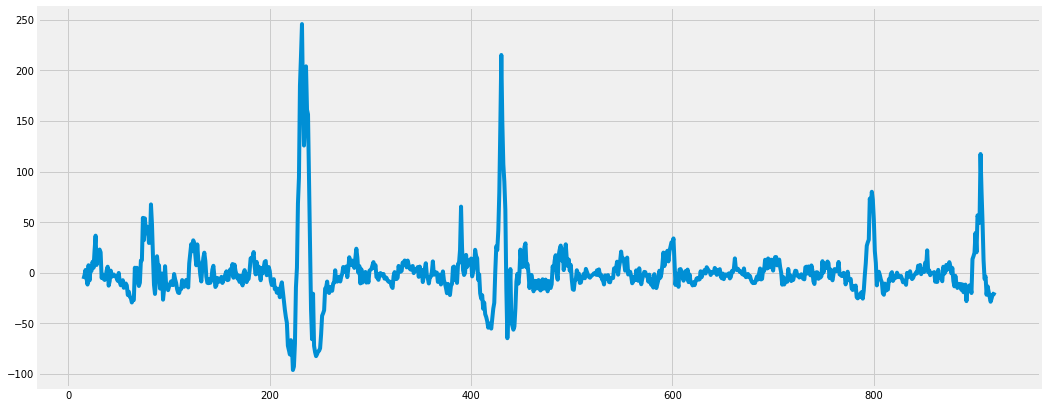

In [1072]:
#Residuals
plt.figure(figsize=(16,7))
plt.plot(result.resid)


These are unexpected events.

### **Stationarity Check.**

In [1073]:
#Perform Augmented Dickey-Fuller test:
#ADF Test- null hypothesis - that the data is non-stationary - if P-value<5% reject the null hypothesis
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.stattools import adfuller

adfuller_result = adfuller(ts, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]} ')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critical Values:')
    print(f'  {key},{value}')

ADF Statistic: -6.650077901931194 
p-value: 5.1473186737591e-09
Critical Values:
  1%,-3.4374315551464734
Critical Values:
  5%,-2.8646662624723502
Critical Values:
  10%,-2.568434614986309


In [1084]:
#First model
newmodel = ARIMA(ts, order=(3,2,3))
results = newmodel.fit()

#Predictions
predictions = results.predict('01/01/2004','01/01/2008')

In [1085]:
#actual values
actuals = df_sj['01/01/2004':'01/01/2008']['total_cases'][0:209]

In [1086]:
#checking on accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(actuals[0:209], predictions)
print('MAE: %f' %mae)

MAE: 24.190813


In [1087]:
#Tuning our model
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
for parameters in pdq:
  try:
    mod =ARIMA(ts, order=parameters)
    results = mod.fit()
    print('ARIMA{} - AIC:{}' . format(parameters, results.aic))
  except:
    continue

ARIMA(0, 0, 0) - AIC:10033.576517474976
ARIMA(0, 0, 1) - AIC:9061.112359130082
ARIMA(0, 1, 0) - AIC:7542.0300656309
ARIMA(0, 1, 1) - AIC:7529.382290620047
ARIMA(1, 0, 0) - AIC:7537.460369490927
ARIMA(1, 0, 1) - AIC:7520.965154362681
ARIMA(1, 1, 0) - AIC:7526.575967309358
ARIMA(1, 1, 1) - AIC:7519.70882314442


In [1088]:
#new predictions

predictions = results.predict('01/01/2004','01/01/2008')

In [1089]:
#new mae
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(actuals[0:209], predictions)
print('MAE: %f' %mae)

MAE: 23.686177


**Decomposing Iquitos Data.**


In [1156]:
df_iq = iq[['week_start_date','total_cases']]
df_iq  = df_iq.set_index('week_start_date')
df_iq

,total_cases
week_start_date,
2000-07-01,0
2000-07-08,0
2000-07-15,0
2000-07-22,0
2000-07-29,0
...,...
2010-05-28,5
2010-06-04,8
2010-06-11,1


In [1157]:
ts1 = df_iq['total_cases']
ts1

week_start_date
2000-07-01    0
2000-07-08    0
2000-07-15    0
2000-07-22    0
2000-07-29    0
             ..
2010-05-28    5
2010-06-04    8
2010-06-11    1
2010-06-18    1
2010-06-25    4
Name: total_cases, Length: 520, dtype: int64

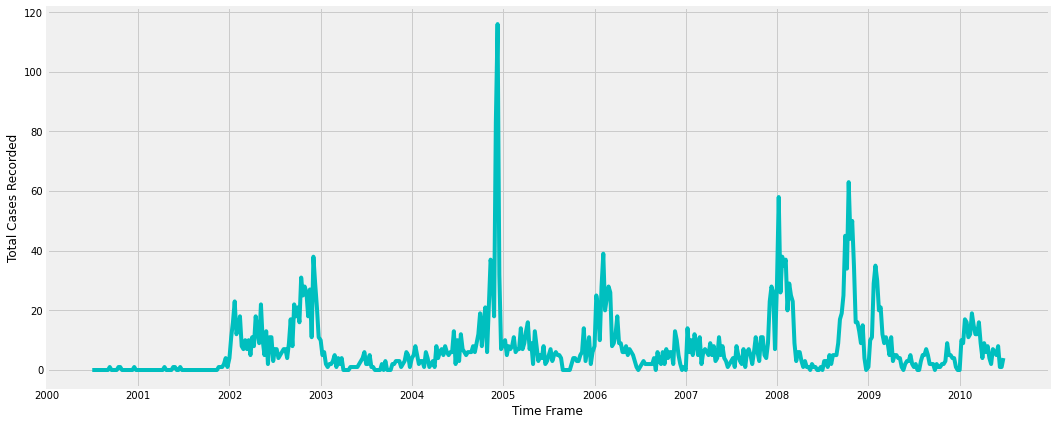

In [1158]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Total Cases Recorded')
ax1.plot(ts1, color='c')

In [1159]:
from pylab import rcParams

dec_iq = iq[['week_start_date','total_cases']]
dec_iq.set_index('week_start_date',inplace=True)
dec_iq.head()

,total_cases
week_start_date,
2000-07-01,0
2000-07-08,0
2000-07-15,0
2000-07-22,0
2000-07-29,0


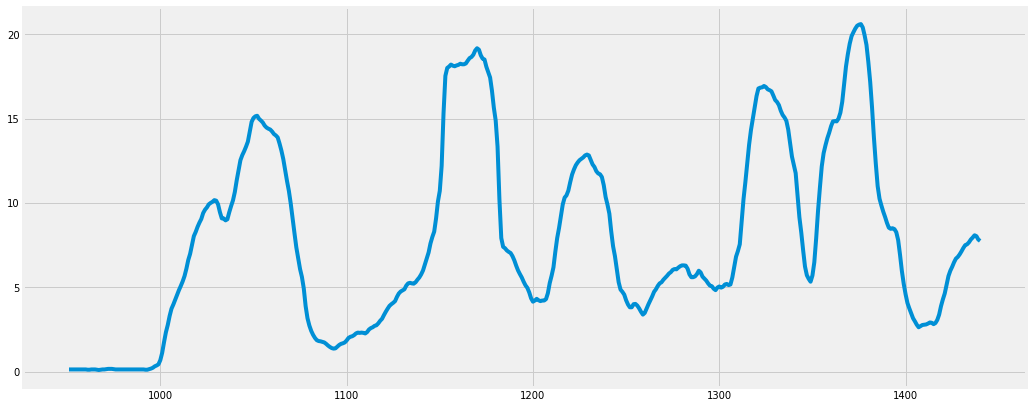

In [1160]:
#Decomposing to three components 
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

#Use an additive model
result_iq = seasonal_decompose(iq['total_cases'], model='additive',freq=30)

plt.figure(figsize=(16,7))
plt.plot(result_iq.trend)

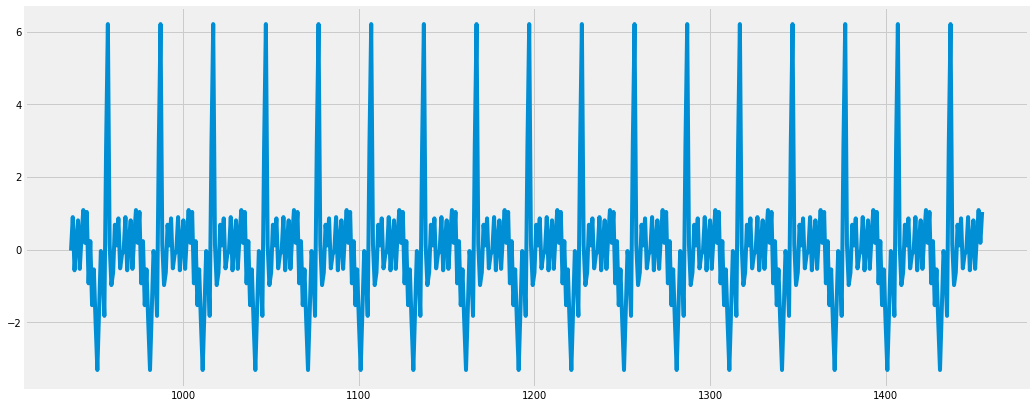

In [1161]:
#Seasonality

plt.figure(figsize=(16,7))
plt.plot(result_iq.seasonal)

There is some seasonality in this dataset too.

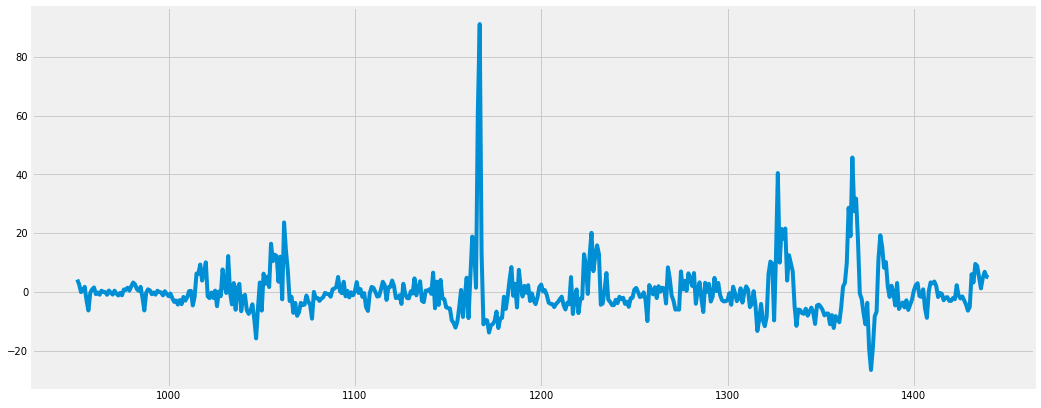

In [1162]:
#Residuals
plt.figure(figsize=(16,7))
plt.plot(result_iq.resid)

These are unexpected events.


**Stationarity Check.**

In [1163]:
#Perform Augmented Dickey-Fuller test:
#ADF Test- null hypothesis - that the data is non-stationary - if P-value<5% reject the null hypothesis
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.stattools import adfuller

adfuller_result = adfuller(ts1, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]} ')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critical Values:')
    print(f'  {key},{value}')

ADF Statistic: -6.085428681900055 
p-value: 1.0672522948401663e-07
Critical Values:
  1%,-3.4431115411022146
Critical Values:
  5%,-2.8671684899522023
Critical Values:
  10%,-2.5697677754736543


In [1171]:
#First model
newmodel = ARIMA(ts, order=(3,2,3))
result_iq = newmodel.fit()

#Predictions
predictions = result_iq.predict('01/01/2004','01/01/2008')

In [1165]:
#actual values
actuals1 = df_iq['01/01/2004':'01/01/2008']['total_cases'][0:209]

In [1166]:
#checking on accuracy
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(actuals1[0:209], predictions)
print('MAE: %f' %mae)

MAE: 11.552571


In [1172]:
#Tuning our model
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
for parameters in pdq:
  try:
    mod =ARIMA(ts1, order=parameters)
    result_iq = mod.fit()
    print('ARIMA{} - AIC:{}' . format(parameters, results.aic))
  except:
    continue

ARIMA(0, 0, 0) - AIC:3525.436615532037
ARIMA(0, 0, 1) - AIC:3525.436615532037
ARIMA(0, 1, 0) - AIC:3525.436615532037
ARIMA(0, 1, 1) - AIC:3525.436615532037
ARIMA(1, 0, 0) - AIC:3525.436615532037
ARIMA(1, 0, 1) - AIC:3525.436615532037
ARIMA(1, 1, 0) - AIC:3525.436615532037
ARIMA(1, 1, 1) - AIC:3525.436615532037


In [1173]:
#new predictions

predictions = result_iq.predict('01/01/2004','01/01/2008')

In [1174]:
#new mae
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(actuals1[0:209], predictions)
print('MAE: %f' %mae)

MAE: 8.821860
